## GAME OF THRONES
we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. 

In [37]:
import pandas as pd
import networkx as nx
%matplotlib inline

In [35]:
book_paths = ['datasets/book1.csv', 'datasets/book2.csv', 'datasets/book3.csv', 
               'datasets/book4.csv', 'datasets/book5.csv']
books =  [pd.read_csv(path) for path in book_paths]

def create_graphs(book):
    edges = [(edge['Source'], edge['Target']) for _, edge in book.iterrows()]
    G_book = nx.Graph()
    G_book.add_edges_from(edges, weight=edge['weight'])
    return G_book
    
book_graphs = [create_graphs(book) for book in books]    

In [36]:
deg_cen_book1 = nx.degree_centrality(book_graphs[0])

deg_cen_book5 = nx.degree_centrality(book_graphs[4])

sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]

sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]

print(sorted_deg_cen_book1, sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)] [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


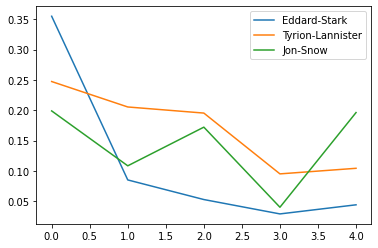

In [39]:
evol = [nx.degree_centrality(book_graph) for book_graph in book_graphs]
 
degree_evol_df = pd.DataFrame.from_records(evol)
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

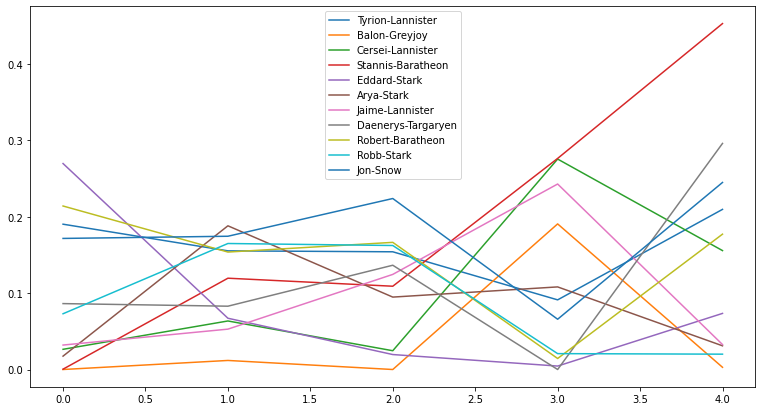

In [40]:
evol = [nx.betweenness_centrality(book_graph, weight='weight') for book_graph in book_graphs]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

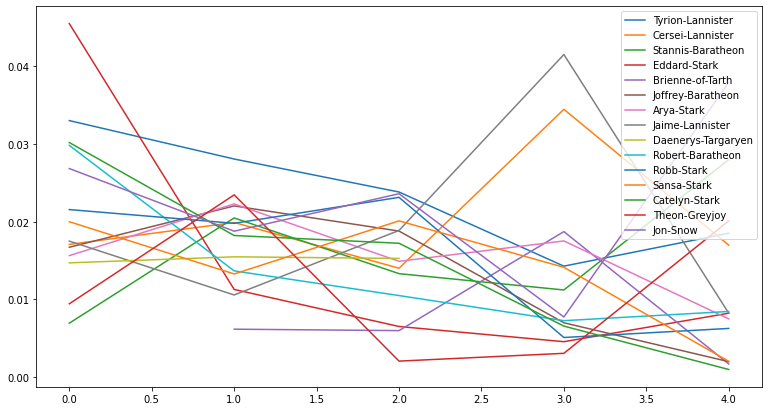

In [42]:
evol = [nx.pagerank(book_graph) for book_graph in book_graphs]

pagerank_evol_df = pd.DataFrame.from_records(evol)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [45]:
measures = [nx.pagerank(book_graphs[4]), 
            nx.betweenness_centrality(book_graphs[4], weight='weight'), 
            nx.degree_centrality(book_graphs[4])]

cor = pd.DataFrame.from_records(measures)

cor.corr()

,Aegon-I-Targaryen,Daenerys-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,Franklyn-Flowers,Haldon,Harry-Strickland,Jon-Connington,Lemore,Rhaegar-Targaryen,...,Tysha,Shrouded-Lord,Theomore,William-Foxglove,Walder-Frey-(son-of-Jammos),Wex-Pyke,Willow-Witch-eye,Thistle,Wylis-Manderly,Wulfe
Aegon-I-Targaryen,1.000000,-0.212344,0.814231,0.638173,0.635934,0.951229,0.996030,0.562079,0.990331,0.663397,...,0.223711,0.999999,0.997928,0.999959,0.998658,0.999914,0.999914,0.982652,0.999952,0.994960
Daenerys-Targaryen,-0.212344,1.000000,0.394404,0.616823,0.619107,0.099463,-0.124512,0.688868,-0.074730,0.590335,...,0.904925,-0.211311,-0.149029,-0.221181,-0.161444,-0.225170,-0.225170,-0.389891,-0.221950,-0.309259
Aegon-Targaryen-(son-of-Rhaegar),0.814231,0.394404,1.000000,0.966575,0.965826,0.953609,0.862678,0.937818,0.886894,0.974558,...,0.747980,0.814844,0.849897,0.808943,0.843208,0.806531,0.806531,0.692438,0.808479,0.751915
Elia-Martell,0.638173,0.616823,0.966575,1.000000,0.999996,0.844550,0.704174,0.995469,0.738806,0.999448,...,0.893147,0.638986,0.686387,0.631177,0.677194,0.627999,0.627999,0.484317,0.630565,0.557758
Franklyn-Flowers,0.635934,0.619107,0.965826,0.999996,1.000000,0.842991,0.702109,0.995741,0.736845,0.999347,...,0.894450,0.636749,0.684271,0.628921,0.675053,0.625735,0.625735,0.481773,0.628308,0.555344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wex-Pyke,0.999914,-0.225170,0.806531,0.627999,0.625735,0.947092,0.994774,0.551159,0.988422,0.653505,...,0.210881,0.999899,0.996996,0.999992,0.997891,1.000000,1.000000,0.985004,0.999995,0.996192
Willow-Witch-eye,0.999914,-0.225170,0.806531,0.627999,0.625735,0.947092,0.994774,0.551159,0.988422,0.653505,...,0.210881,0.999899,0.996996,0.999992,0.997891,1.000000,1.000000,0.985004,0.999995,0.996192
Thistle,0.982652,-0.389891,0.692438,0.484317,0.481773,0.877515,0.962241,0.398936,0.947423,0.513114,...,0.039070,0.982455,0.968683,0.984290,0.971727,0.985004,0.985004,1.000000,0.984429,0.996296
Wylis-Manderly,0.999952,-0.221950,0.808479,0.630565,0.628308,0.948147,0.995106,0.553912,0.988918,0.656001,...,0.214109,0.999941,0.997246,1.000000,0.998100,0.999995,0.999995,0.984429,1.000000,0.995899


In [46]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank, b_cent, d_cent)

Jon-Snow Stannis-Baratheon Jon-Snow
